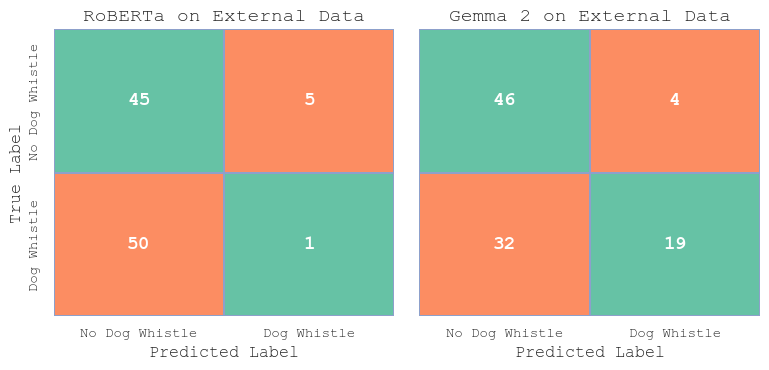

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
import numpy as np
from matplotlib.colors import ListedColormap


sns.set(style="whitegrid", font="Courier New") # Set style once

set2 = sns.color_palette("Set2")
incorrect_color = set2[1]  #
correct_color = set2[0]  

# Create a colormap: Index 0 maps to incorrect_color, Index 1 maps to correct_color
custom_cmap = ListedColormap([incorrect_color, correct_color])


try:
    roberta_df = pd.read_csv("../eval/roberta_external_predictions.csv")
    gemma_df = pd.read_csv("../eval/gemma_external_predictions.csv")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure 'eval/roberta_external_predictions.csv' and 'eval/gemma_external_predictions.csv' exist.")
    exit() 

# Convert label columns to integers 
for df in [roberta_df, gemma_df]:
    df['true_label'] = df['true_label'].astype(int)
    df['predicted_label'] = df['predicted_label'].astype(int)


cm_roberta = confusion_matrix(roberta_df['true_label'], roberta_df['predicted_label'])
cm_gemma = confusion_matrix(gemma_df['true_label'], gemma_df['predicted_label'])
labels = ["No Dog Whistle", "Dog Whistle"] 

# --- Simplified Plotting Function ---
def plot_simplified_confmat(cm, ax, title, show_yticklabels, cmap):
    """Plots a confusion matrix with specific colors for correct/incorrect predictions."""
    if cm.shape != (2, 2):
        raise ValueError("This function is designed for 2x2 confusion matrices.")
  
    correctness_matrix = np.array([[1, 0], [0, 1]]) 

    sns.heatmap(
        correctness_matrix,
        annot=cm,           
        fmt="d",           
        cmap=cmap,
        cbar=False,       
        xticklabels=labels,
        yticklabels=labels if show_yticklabels else False,
        linewidths=0.1,
        linecolor='#8DA0CB',
        ax=ax,
        square=False,        
        annot_kws={"size": 14, "color": "white", "weight": "bold"}, 
        vmin=0,            
        vmax=1
    )
    ax.set_xlabel("Predicted Label", fontsize=12)
    if show_yticklabels:
        ax.set_ylabel("True Label", fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 

plot_simplified_confmat(cm_roberta, axes[0], "RoBERTa on External Data", True, custom_cmap)
plot_simplified_confmat(cm_gemma, axes[1], "Gemma 2 on External Data", False, custom_cmap) 

plt.tight_layout(pad=1.5) # Add padding
plt.savefig("../plots/external_confusion_matrices_simplified.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
test_df = pd.read_csv("../eval/gemma_external_predictions_corrected.csv")
accuracy = accuracy_score(test_df['true_label'], test_df['predicted_label'])
f1 = f1_score(test_df['true_label'], test_df['predicted_label'])

print("External validation accuracy:", accuracy)
print("External validation F1 score:", f1)

External validation accuracy: 0.6732673267326733
External validation F1 score: 0.547945205479452
